# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [62]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0013900000000000008, E_test is 0.014559999999999977
Average number of iterations is 2127.3.


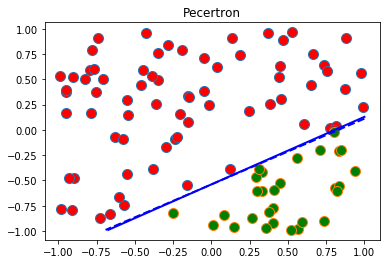

In [63]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train = E_test = 0
total_iters = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g, iters = perceptron(X_train, y_train)
    
    # Compute training, testing error
    w_y_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train))))
    E_train += np.sum(y_train != w_y_train)/nTrain
    w_y_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test))))
    E_test += np.sum(y_test != w_y_test)/nTest
    # Sum up number of iterations
    total_iters += iters
E_train /= nRep
E_test /= nRep
avgIter = total_iters/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.07, E_test is 0.148
Average number of iterations is 10000.


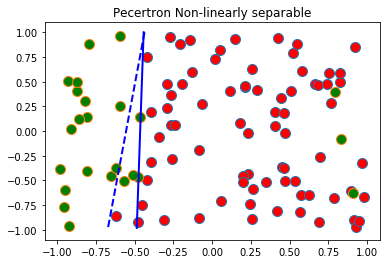

In [64]:
nTrain = 100 # number of training data
nTest = 1000
totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
X_train = totalX[:, :nTrain]
y_train = totaly[:, :nTrain]
X_test = totalX[:, nTrain:]
y_test = totaly[:, nTrain:]
w_g, avgIter = perceptron(X_train, y_train)
    
w_y_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train))))
E_train = np.sum(y_train != w_y_train)/nTrain
w_y_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test))))
E_test = np.sum(y_test != w_y_test)/nTest

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g, 'Pecertron Non-linearly separable')

### Part3: Linear Regression

E_train is 0.03913000000000005, E_test is 0.048115000000000026


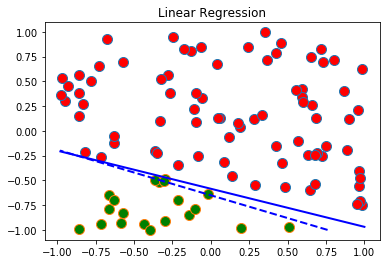

In [65]:
from linear_regression import linear_regression

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train = E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
    w_y_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train))))
    E_train += np.sum(y_train != w_y_train)/nTrain
    w_y_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test))))
    E_test += np.sum(y_test != w_y_test)/nTest
    # Sum up number of iterations

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_train, y_train, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13377000000000003, E_test is 0.1450879999999999


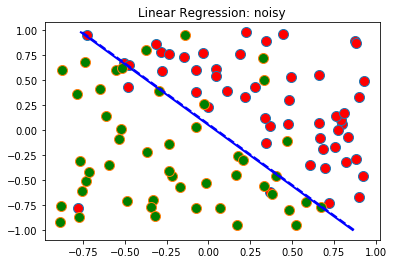

In [66]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train = E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error
    w_y_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train))))
    E_train += np.sum(y_train != w_y_train)/nTrain
    w_y_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test))))
    E_test += np.sum(y_test != w_y_test)/nTest
    # Sum up number of iterations

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X_train, y_train, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [67]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
w_y_train = np.sign(np.matmul(w.T, np.vstack((np.ones((1,X.shape[1])),X))))
E_train = np.sum(y != w_y_train)/y.shape[1]
w_y_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1,X_test.shape[1])),X_test))))
E_test = np.sum(y_test != w_y_test)/y_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_trans = np.zeros((X.shape[0] + 3, X.shape[1]))
X_trans[0:2] = X[0:2]
X_trans[2] = X[0]*X[1]
X_trans[3] = X[0]*X[0]
X_trans[4] = X[1]*X[1]
X_trans_test = np.zeros((X_test.shape[0] + 3, X_test.shape[1]))
X_trans_test[0:2] = X_test[0:2]
X_trans_test[2] = X_test[0]*X_test[1]
X_trans_test[3] = X_test[0]*X_test[0]
X_trans_test[4] = X_test[1]*X_test[1]
w = linear_regression(X_trans, y)
# Compute training, testing error
w_y_train = np.sign(np.matmul(w.T, np.vstack((np.ones((1,X_trans.shape[1])),X_trans))))
E_train = np.sum(y != w_y_train)/y.shape[1]
w_y_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1,X_trans_test.shape[1])),X_trans_test))))
E_test = np.sum(y_test != w_y_test)/y_test.shape[1]
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.0024000000000000007, E_test is 0.012609999999999994


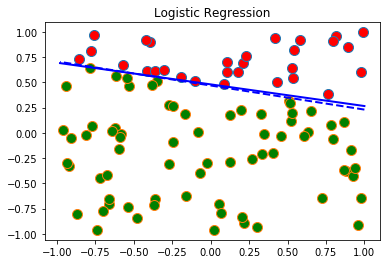

In [68]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train = E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    for j in range(totaly.shape[1]):
        if(totaly[0][j] == -1):
            totaly[0][j] = 0

    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g = logistic(X_train, y_train);
    # Compute training, testing error
    w_y_train = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train)))))
    for j in range(w_y_train.shape[1]):
        if(w_y_train[0][j] > 0.5):
            w_y_train[0][j] = 1
        else:
            w_y_train[0][j] = 0
    E_train += np.sum(y_train != w_y_train)/nTrain
    w_y_test = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test)))))
    for j in range(w_y_test.shape[1]):
        if(w_y_test[0][j] > 0.5):
            w_y_test[0][j] = 1
        else:
            w_y_test[0][j] = 0
    E_test += np.sum(y_test != w_y_test)/nTest
    
E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
for i in range(y.shape[1]):
    if(y_train[0][i] == 0):
        y_train[0][i] = -1
plotdata(X_train, y_train, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.11919999999999994, E_test is 0.13344


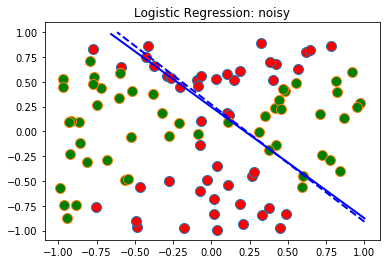

In [69]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100 # number of replicates
nTrain = 100 # number of training data
nTest = 1000
E_train = E_test = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
    for j in range(totaly.shape[1]):
        if(totaly[0][j] == -1):
            totaly[0][j] = 0

    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g = logistic(X_train, y_train);
    # Compute training, testing error
    w_y_train = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train)))))
    for j in range(w_y_train.shape[1]):
        if(w_y_train[0][j] > 0.5):
            w_y_train[0][j] = 1
        else:
            w_y_train[0][j] = 0
    E_train += np.sum(y_train != w_y_train)/nTrain
    w_y_test = 1/(1+np.exp(-np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test)))))
    for j in range(w_y_test.shape[1]):
        if(w_y_test[0][j] > 0.5):
            w_y_test[0][j] = 1
        else:
            w_y_test[0][j] = 0
    E_test += np.sum(y_test != w_y_test)/nTest

E_train /= nRep
E_test /= nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
for i in range(y.shape[1]):
    if(y_train[0][i] == 0):
        y_train[0][i] = -1
plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.01073090000000001
Average number of support vectors is 3.505.


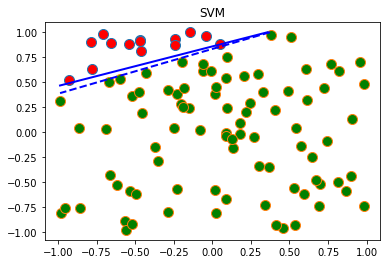

In [70]:
from svm import svm

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = E_test = 0
total_sc = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest)
    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g, num_sc = svm(X_train, y_train)
    
    # Compute training, testing error
    w_y_train = np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train)))
    E_train += np.sum(w_y_train*y_train < 0)/nTrain
    w_y_test = np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test)))
    E_test += np.sum(w_y_test*y_test<0)/nTest
    # Sum up number of support vectors
    total_sc += num_sc
    
E_train /= nRep
E_test /= nRep
avgNum = total_sc/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X_train, y_train, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

E_train is 0.4035699999999996, E_test is 0.40260110000000043
Average number of support vectors is 0.01.


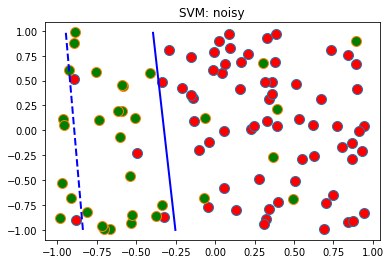

In [72]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
E_train = E_test = 0
total_sc = 0
for i in range(nRep):
    totalX, totaly, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = totalX[:, :nTrain]
    y_train = totaly[:, :nTrain]
    X_test = totalX[:, nTrain:]
    y_test = totaly[:, nTrain:]
    w_g, num_sc = svm(X_train, y_train)
    
    # Compute training, testing error
    w_y_train = np.matmul(w_g.T, np.vstack((np.ones((1,X_train.shape[1])),X_train)))
    E_train += np.sum(w_y_train*y_train < 0)/nTrain
    w_y_test = np.matmul(w_g.T, np.vstack((np.ones((1,X_test.shape[1])),X_test)))
    E_test += np.sum(w_y_test*y_test<0)/nTest
    # Sum up number of support vectors
    total_sc += num_sc
    
E_train /= nRep
E_test /= nRep
avgNum = total_sc/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X_train, y_train, w_f, w_g, 'SVM: noisy')